# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1668]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [1669]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [1670]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        return ((X.dot(w) - y) ** 2).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        return 2 * X.transpose().dot(X.dot(w) - y) / y.shape #воспользуемся формулой, представленной выше
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [1671]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [1672]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    a = []
    for t in range(n_iterations):
        w_init1 = w_init - lr * loss.calc_grad(X, y, w_init)
        w_init = w_init1
        a.append(w_init)
    return a

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [1673]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [1674]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.8670644395649493


In [1675]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


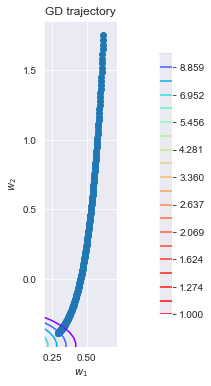

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


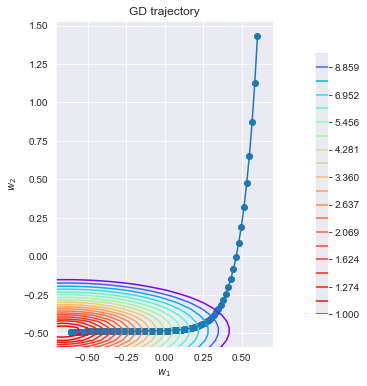

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


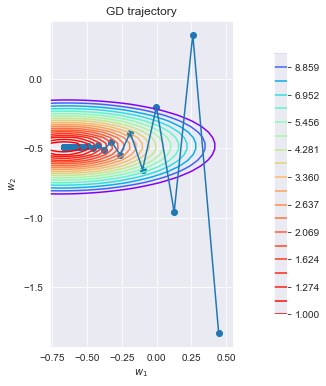

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


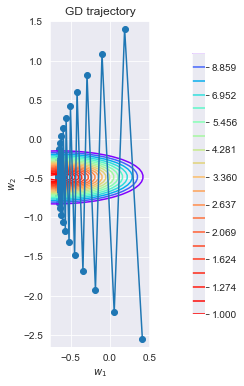

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


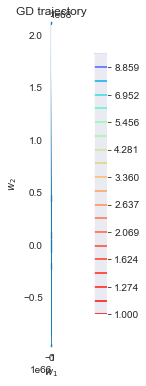

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


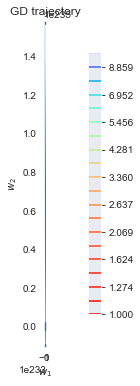

In [1676]:
# -- YOUR CODE HERE --
for lr in [.0001, .001, .01, .012, .02, .1]:
    w_list = gradient_descent(w_init, X, y, loss, lr, n_iterations = 200)
    plot_gd(w_list, X, y, loss)

Таким образом, при очень маленьком шаге есть шанс не дойти до минимума (при lr = 0.0001), не хватает итераций.
При шаге lr = 0.001 линия спуска гладкая, однако тоже есть вероятность не дойти "идеально" до минимума. Однако такой размер шага будет наиболее подходящим, стоит немного повысить количество итераций.
при lr =  .01, .012 доходим до минимума но с резкими переходами.
увеличив шаг lr = .02 и больше график получился "сплюснутым", шаг очень большой - не попадаем в минимум.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [1677]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    a = []
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w_init1 = w_init - lr * loss.calc_grad(batch, y[batch_indices], w_init)
        w_init = w_init1
        a.append(w_init)
    return a

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

batch = 10, lr = 0.001


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


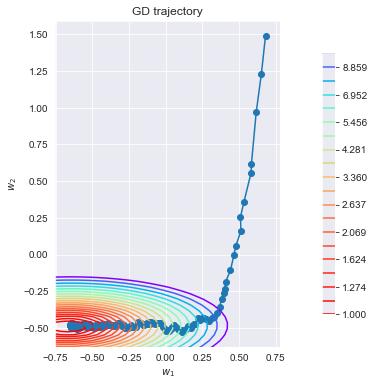

batch = 10, lr = 0.005


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


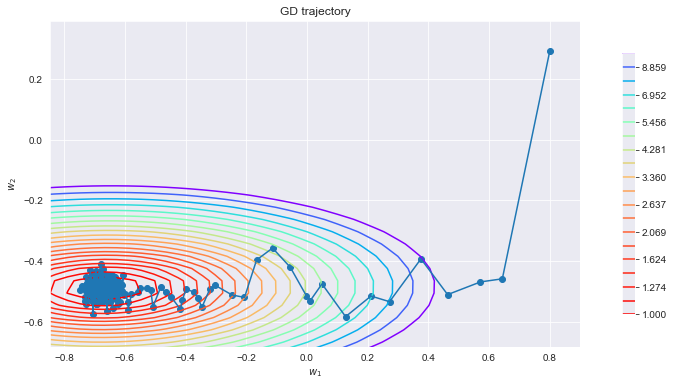

batch = 10, lr = 0.01


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


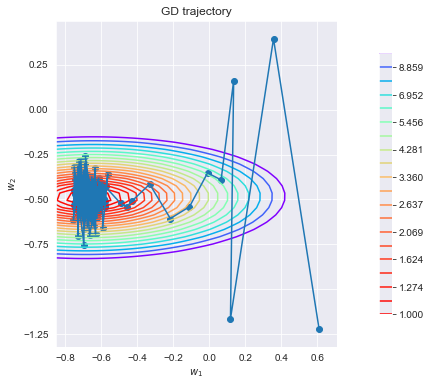

batch = 10, lr = 0.02


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


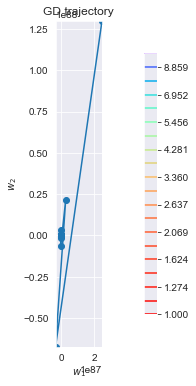

batch = 30, lr = 0.001


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


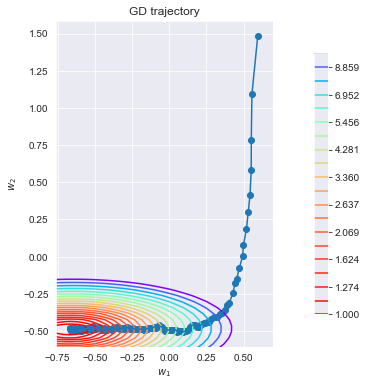

batch = 30, lr = 0.005


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


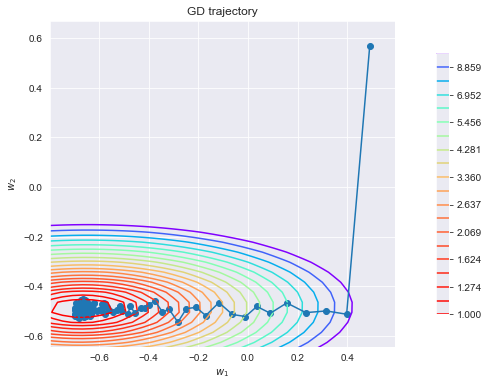

batch = 30, lr = 0.01


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


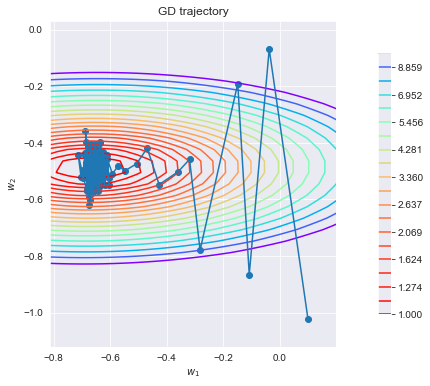

batch = 30, lr = 0.02


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


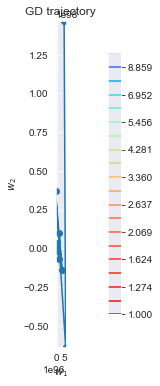

batch = 50, lr = 0.001


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


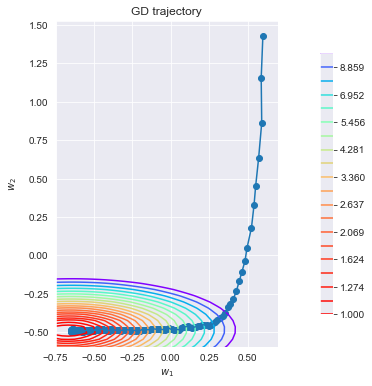

batch = 50, lr = 0.005


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


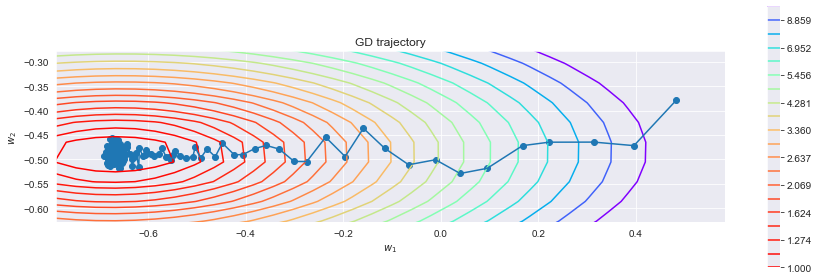

batch = 50, lr = 0.01


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


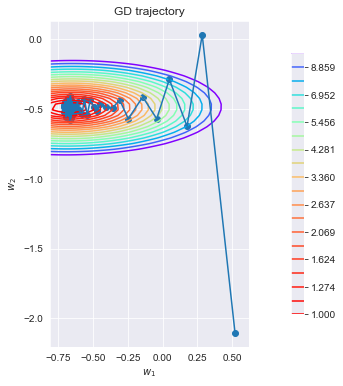

batch = 50, lr = 0.02


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


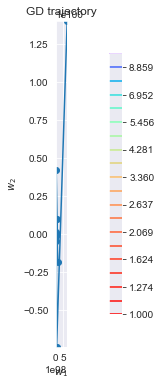

batch = 100, lr = 0.001


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


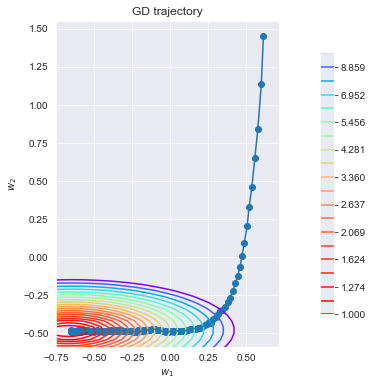

batch = 100, lr = 0.005


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


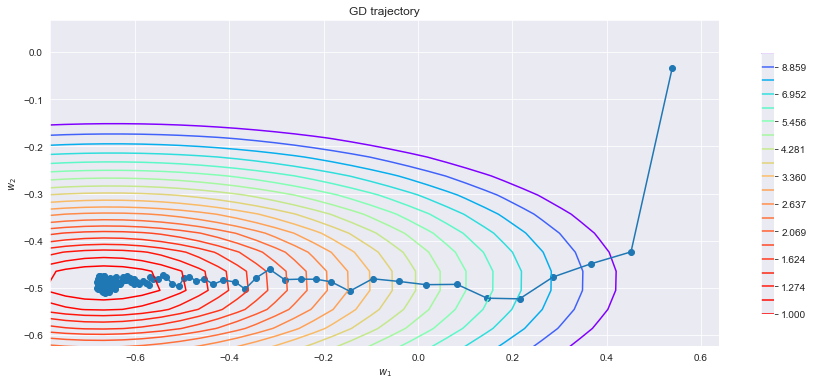

batch = 100, lr = 0.01


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


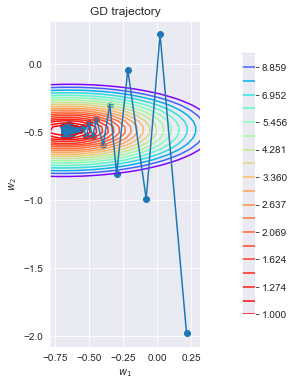

batch = 100, lr = 0.02


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


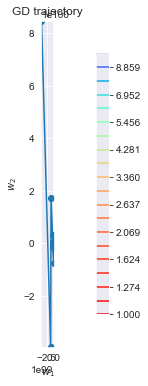

In [1678]:
# -- YOUR CODE HERE --
for batch in [10, 30, 50, 100]:
    for lr in [.001, .005, .01, .02]:
    #for batch in [10, 30, 50, 100]:
        print(f'batch = {batch}, lr = {lr}')
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch, 300)
        plot_gd(w_list, X, y, loss)

При размере шага 0.001 график является очень гладким при любых размерах подвыборки. Нет резких перепадов значений. Особенно при приближении к минимуму.
При большом шаге 0.02 минимум не находится при любых размерах подвыборки.
Рассмотрим как влияет размер плдвыборки на спуск при шагах равных 0.005 и 0.01.
С увеличением размера подвыборки и шага график градиентного спуска дольше "останавливается" у минимума функции. Таким образом, удобным способом является уменьшение размера шага при приближении к минимуму.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [1679]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    a = []
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        n = lr * (t + 1) ** (-p)
        w_init1 = w_init - n * loss.calc_grad(batch, y[batch_indices], w_init)
        w_init = w_init1
        a.append(w_init)
    return(a)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


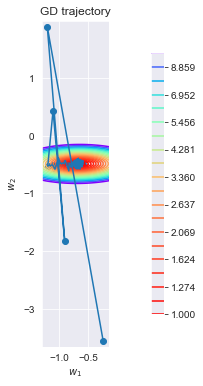

p = 0.3


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


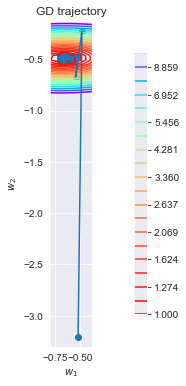

p = 0.5


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


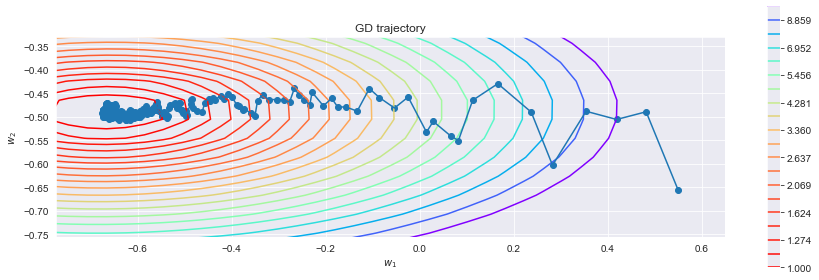

p = 0.7


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


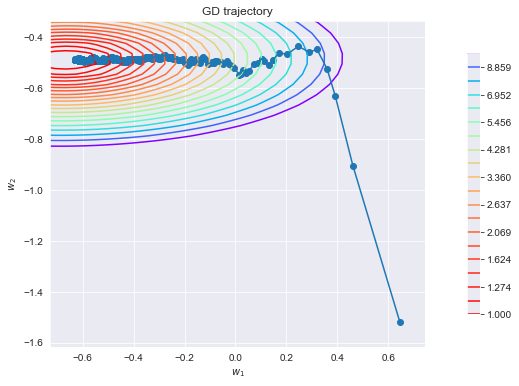

p = 1


C:\Users\81E4~1\AppData\Local\Temp/ipykernel_21668/1175621037.py:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend="both")


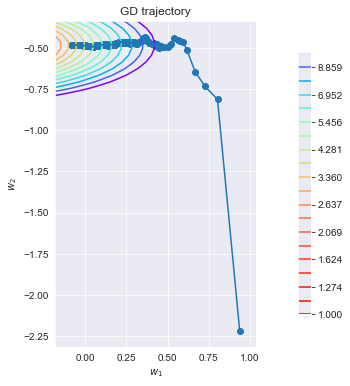

In [1680]:
# -- YOUR CODE HERE --
for p in [.1, .3, .5, .7, 1]:
    print(f'p = {p}')
    w_list = stochastic_gradient_descent(w_init, X, y, loss, .01, 10, p, 1000)
    plot_gd(w_list, X, y, loss)

глядя на полученные графики, можно сказать, что при увеличении p траектория спуска становится более ровной. Лучшая траектория из полученных - при параметре p = 0.7, поскольку она не такая неровная и ближе к минимуму, чем при p = 1.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

lr = 0.001, batch_size = 10, p = 0.1


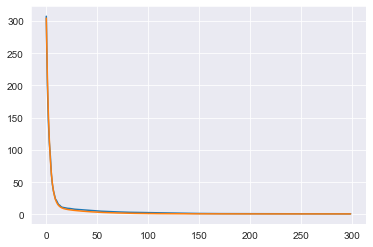

lr = 0.001, batch_size = 10, p = 0.3


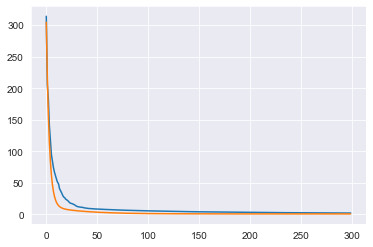

lr = 0.001, batch_size = 10, p = 1


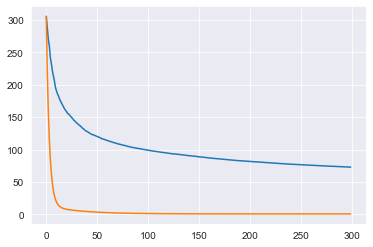

lr = 0.001, batch_size = 30, p = 0.1


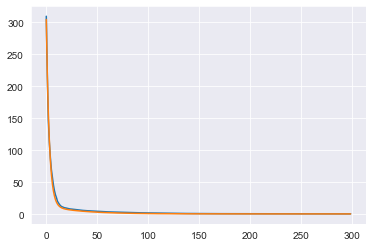

lr = 0.001, batch_size = 30, p = 0.3


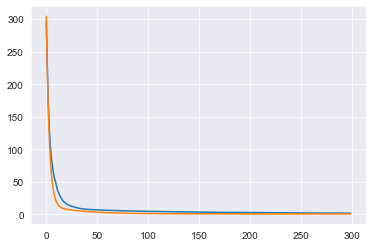

lr = 0.001, batch_size = 30, p = 1


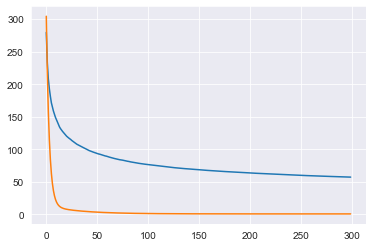

lr = 0.001, batch_size = 50, p = 0.1


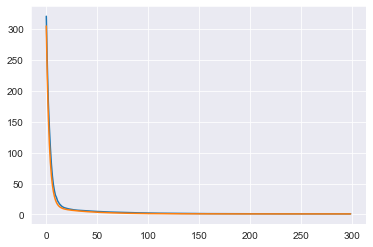

lr = 0.001, batch_size = 50, p = 0.3


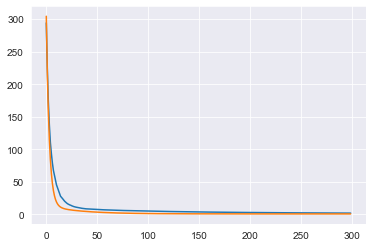

lr = 0.001, batch_size = 50, p = 1


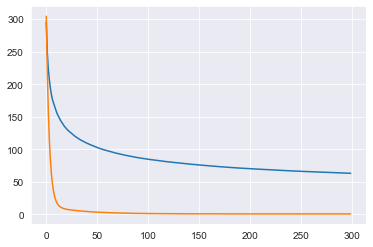

lr = 0.001, batch_size = 100, p = 0.1


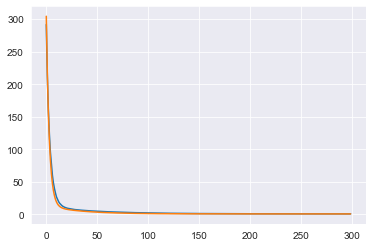

lr = 0.001, batch_size = 100, p = 0.3


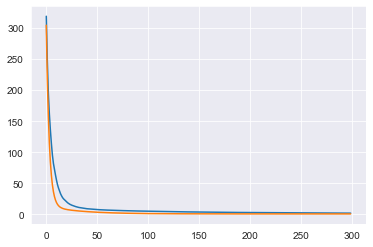

lr = 0.001, batch_size = 100, p = 1


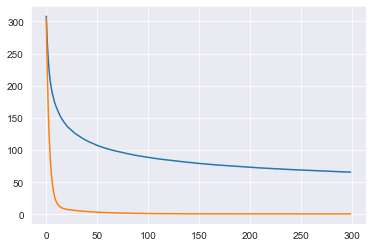

lr = 0.01, batch_size = 10, p = 0.1


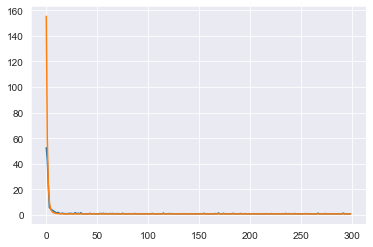

lr = 0.01, batch_size = 10, p = 0.3


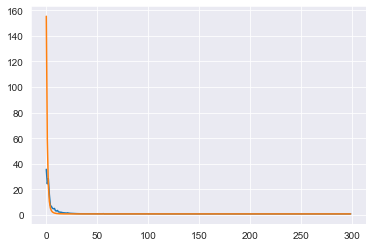

lr = 0.01, batch_size = 10, p = 1


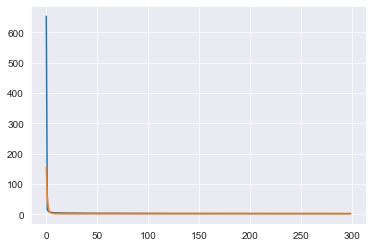

lr = 0.01, batch_size = 30, p = 0.1


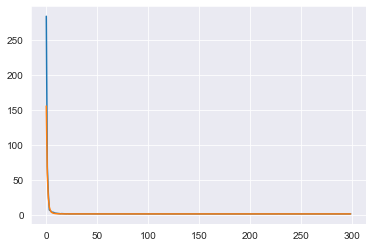

lr = 0.01, batch_size = 30, p = 0.3


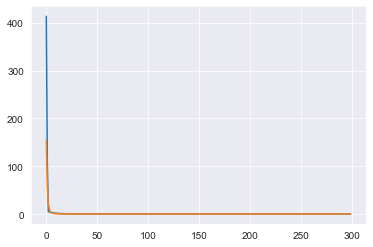

lr = 0.01, batch_size = 30, p = 1


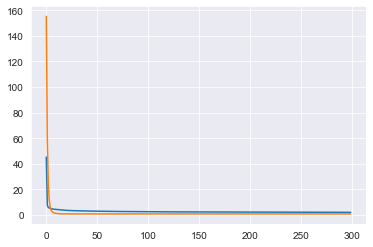

lr = 0.01, batch_size = 50, p = 0.1


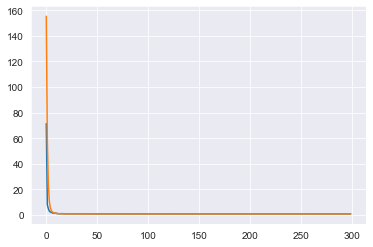

lr = 0.01, batch_size = 50, p = 0.3


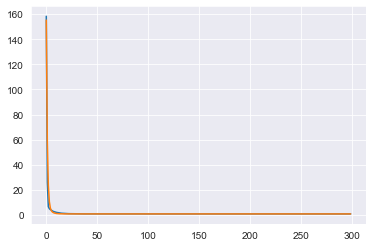

lr = 0.01, batch_size = 50, p = 1


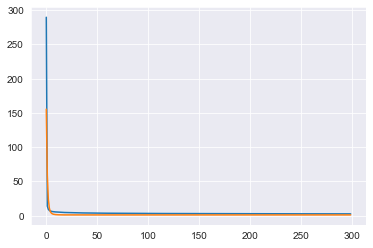

lr = 0.01, batch_size = 100, p = 0.1


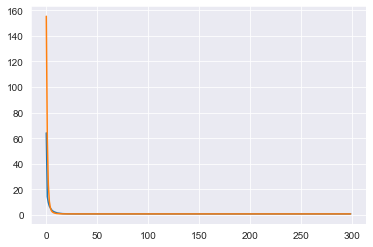

lr = 0.01, batch_size = 100, p = 0.3


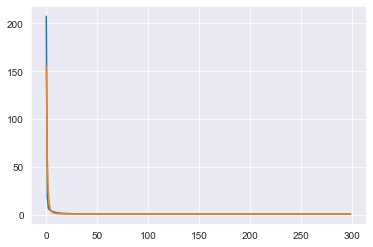

lr = 0.01, batch_size = 100, p = 1


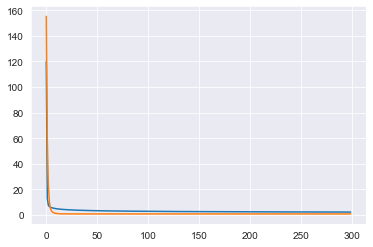

In [1681]:
# -- YOUR CODE HERE --
n_iterations = 300
def plotting_s(X, y, w_init, batch_size, lr, n_iterations, p):
    losses_stoch = []
    losses = []
    w_init1 = w_init
    w_init2 = w_init
    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]

        n = lr * (t + 1) ** (-p)

        w_init_st = w_init1 - n * loss.calc_grad(batch, y[batch_indices], w_init1)
        w_init1 = w_init_st
        losses_stoch.append(loss.calc_loss(X, y, w_init1))

        w_init_usual = w_init2 - lr * loss.calc_grad(X, y, w_init2)
        w_init2 = w_init_usual
        losses.append(loss.calc_loss(X, y, w_init2))
    plt.plot(np.arange(n_iterations), losses_stoch, np.arange(n_iterations), losses)
    plt.show()

for lr in [.001, .01]:
    for batch_size in [10, 30, 50, 100]:
        for p in [.1, .3, 1]:
            print(f'lr = {lr}, batch_size = {batch_size}, p = {p}')
            plotting_s(X, y, w_init, batch_size, lr, n_iterations, p)

Таким образом, график стохастического град. спуска почти полностью совпадает с графиком обычного град.спуска. Везде кроме p = 1 и lr = 0.1 проблем со сходимостью не возникло, параметры подошли. В случае, когда sgd плохой относительно gd, стоит уменьшить шаг, p. SGD лучше, поскольку он более быстрый. В данной выборке у нас мало признаков, поэтому очобой разницы между gd и sgd не видно.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [1682]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        w_init = np.random.uniform(-2, 2, X.shape[1])

        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=100000)[-1]
        #print('test', X.shape)
        #print(len(self.w))

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        #print('predict', X.shape)

        # -- YOUR CODE HERE --
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [1683]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [1684]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index() #удаление строк, где y = nan

In [1685]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [1686]:
X_raw = X_raw.drop('index', axis = 1)

In [1687]:

(X_raw).head() #посмотрим на данные

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [1688]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [1689]:
#one-hot кодирование (семинар 6)
X_raw = pd.get_dummies(X_raw, drop_first=True)
print(f"Data shape: {X_raw.shape}")


Data shape: (201, 64)


In [1690]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, random_state=20, test_size=0.3)

In [1691]:
# -- YOUR CODE HERE --

X_train.isna().sum()
X_test.columns = X_raw.columns.astype('str')
X_train.columns = X_raw.columns.astype('str')
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)



(140,) (140, 64)
(61,) (61, 64)


In [1692]:
#воспользуемся материалом семинара 6
#у категориальных признаков nan значения заменены на пустые, а у числовых - на среднее


mask1 = (X_train.dtypes == 'object').values
mask2 = (X_test.dtypes == 'object').values

X_cat_train = X_train[X_train.columns[mask1]].fillna('')
X_cat_test = X_test[X_test.columns[mask2]].fillna('')

imputer = SimpleImputer(strategy='mean')
X_no_mis_real_train = pd.DataFrame(data=imputer.fit_transform(X_train[X_train.columns[~mask1]]), columns=X_train[X_train.columns[~mask1]].columns)
X_no_mis_real_test = pd.DataFrame(data=imputer.transform(X_test[X_test.columns[~mask2]]), columns=X_test[X_test.columns[~mask2]].columns)


X_train = pd.concat([X_cat_train.reset_index(drop=True), X_no_mis_real_train.reset_index(drop=True)], axis = 1)
X_test = pd.concat([X_cat_test.reset_index(drop=True), X_no_mis_real_test.reset_index(drop=True)], axis = 1)


In [1693]:
#масштабирование (семинар 6)
normalizer = MinMaxScaler()

X_train = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train)

X_test = normalizer.transform(X_test)
X_test = pd.DataFrame(data = X_test)

y_train.shape

(140,)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [1694]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)


**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [1695]:
from sklearn.metrics import mean_squared_error

# -- YOUR CODE HERE --
test_without_lasso = mean_squared_error(y_test, linear_regression.predict(X_test))
train_without_lasso = mean_squared_error(y_train, linear_regression.predict(X_train))
print('test:', test_without_lasso)
print('train:', train_without_lasso)


test: 18869896.09928062
train: 1506685.1193392498


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [1696]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return ((X.dot(w) - y) ** 2 ).mean() + self.coef * (w[:-1] ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w1 = w
        w1[-1] = 0

        return 2 * X.transpose().dot(X.dot(w) - y) / y.shape + (2 * self.coef * w1)

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [1697]:
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [1698]:
# -- YOUR CODE HERE --
linear_regression_l2.fit(X_train, y_train)

In [1699]:

print('without lasso')
print('test:', test_without_lasso)
print('train:', train_without_lasso)
print('lasso')
linear_regression_l2 = LinearRegression(MSEL2Loss(0.1))
lr_lasso = linear_regression_l2.fit(X_train, y_train)
print('test:', mean_squared_error(y_test, linear_regression_l2.predict(X_test)))
print('train:', mean_squared_error(y_train, linear_regression_l2.predict(X_train)))

without lasso
test: 18869896.09928062
train: 1506685.1193392498
lasso
test: 8767755.149382746
train: 10011742.253050769


при random_state = 15: улучшения не произошло.
поменяв random_seed, стало видно улучшение на test. Подберем коэффициент для большего улучшения.

In [1700]:
delta = []
test_error = []
train_error = []
x = [.00005, .0006, .005, .01, .1, .5, 1]
for c in x:
    linear_regression = LinearRegression(MSEL2Loss(c))
    lr_lasso = linear_regression.fit(X_train, y_train)
    test = mean_squared_error(y_test, lr_lasso.predict(X_test))
    tr =  mean_squared_error(y_train, lr_lasso.predict(X_train))

    test_error.append(test)
    train_error.append(tr)


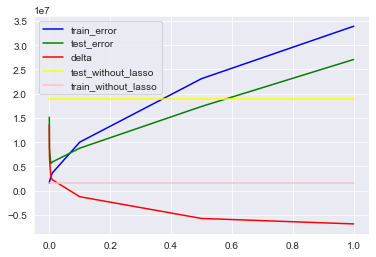

In [1701]:
plt.plot(x, train_error, c = 'blue', label = 'train_error')
plt.plot(x, test_error, c = 'green', label = 'test_error')
plt.plot(x, np.array(test_error) - np.array(train_error), c = 'red', label = 'delta')
plt.plot(x, np.full(shape=len(x),fill_value=test_without_lasso,), c = 'yellow', label = 'test_without_lasso')
plt.plot(x, np.full(shape=len(x),fill_value=train_without_lasso,), c = 'pink', label = 'train_without_lasso')
plt.legend()
plt.show()

При увеличении коэффициента ошибка увеличиватеся, рассмотрим более маленькие коэффициенты

In [1702]:
delta = []
test_error = []
train_error = []
x = [.00001, .00005, .0001, .0003, .0004, .0005, .0006, .0007, .0008, .001, .0015, .002, .003, .004]
for c in x:
    linear_regression = LinearRegression(MSEL2Loss(c))
    lr_lasso = linear_regression.fit(X_train, y_train)
    test = mean_squared_error(y_test, lr_lasso.predict(X_test))
    tr =  mean_squared_error(y_train, lr_lasso.predict(X_train))

    test_error.append(test)
    train_error.append(tr)


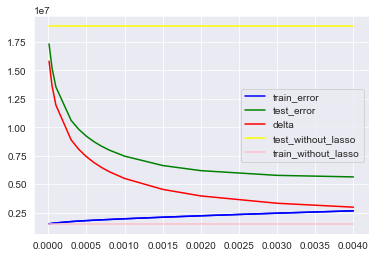

In [1703]:
plt.plot(x, train_error, c = 'blue')
plt.plot(x, train_error, c = 'blue', label = 'train_error')
plt.plot(x, test_error, c = 'green', label = 'test_error')
plt.plot(x, np.array(test_error) - np.array(train_error), c = 'red', label = 'delta')
plt.plot(x, np.full(shape=len(x),fill_value=test_without_lasso,), c = 'yellow', label = 'test_without_lasso')
plt.plot(x, np.full(shape=len(x),fill_value=train_without_lasso,), c = 'pink', label = 'train_without_lasso')
plt.legend()
plt.show()

Таким образом, наилучший результат наблюдается при коэффициенте = 0.0015.

In [1704]:
print('best: train_error with lasso =', train_error[x.index(0.0015)])
print('best: test_error with lasso =', test_error[x.index(0.0015)])

best: train_error with lasso = 2095969.3675288397
best: test_error with lasso = 6635856.567651303


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [1705]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        xwy = X.dot(w) - y
        xwy[abs(xwy) < self.eps] = 0.5 * xwy[abs(xwy) < self.eps] ** 2
        xwy[abs(xwy) >= self.eps] = (abs(xwy[abs(xwy) >= self.eps]) - self.eps * .5) * self.eps
        return xwy.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        xwy = X.dot(w) - y
        xwy[abs(xwy) >= self.eps] = self.eps * np.sign(xwy[abs(xwy) >= self.eps])
        return (X * xwy[:, None]).mean(axis = 0)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [1706]:
# -- YOUR CODE HERE --
hb = LinearRegression(HuberLoss(.1))

In [1707]:
hb.fit(X_train, y_train)

print(f'on train = {mean_squared_error(y_train, hb.predict(X_train))}')
print(f'on test = {mean_squared_error(y_test, hb.predict(X_test))}')

on train = 105812034.81229576
on test = 105113586.57802187


In [1708]:
params = [0, .001, .01, .1, .3, .6, .8, .9, 1, 5, 10, 40, 150, 300, 1000]
hb_train = []
hb_test = []
for e in params:
    hb = LinearRegression(HuberLoss(e))
    hb.fit(X_train, y_train)
    hb_test.append(mean_squared_error(y_test, hb.predict(X_test)))
    hb_train.append(mean_squared_error(y_train, hb.predict(X_train)))




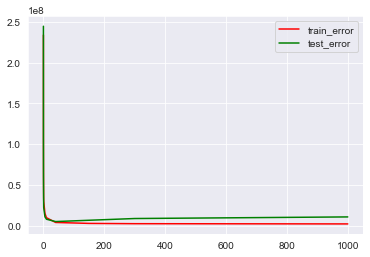

In [1709]:
plt.plot(params, hb_train, c = 'red', label = 'train_error')
plt.plot(params, hb_test, c = 'green', label = 'test_error')
plt.legend()
plt.show()

 Рассмотрим область 10 - 200

In [1710]:
params = [10, 30, 50, 60, 70, 100, 150, 200]
hb_train = []
hb_test = []
for e in params:
    hb = LinearRegression(HuberLoss(e))
    hb.fit(X_train, y_train)
    hb_test.append(mean_squared_error(y_test, hb.predict(X_test)))
    hb_train.append(mean_squared_error(y_train, hb.predict(X_train)))


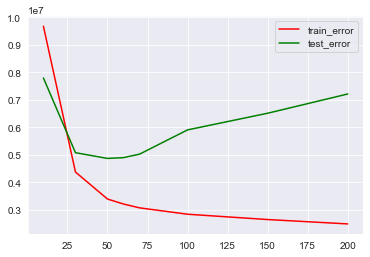

In [1711]:
plt.plot(params, hb_train, c = 'red', label = 'train_error')
plt.plot(params, hb_test, c = 'green', label = 'test_error')
plt.legend()
plt.show()

Таким образом, коэффициент 60 дает наилучшие результаты

In [1712]:
print('error on train:', hb_train[params.index(60)])
print('error on test:', hb_test[params.index(60)])

error on train: 3214255.888798021
error on test: 4899243.79277368


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

# -- YOUR MEME HERE --
Кот Бендер
https://memepedia.ru/wp-content/uploads/2021/12/ben.jpg


### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [1713]:
# -- YOUR CODE HERE --
